In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Итак, мы загрузили данные в таблицу data. Объект data имеет тип DataFrame – это основной тип данных в библиотеке pandas, предназначенный для представления табличных данных.

In [23]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('df.csv')
data.head(3)

,ID,Размер,#1 Доля горожан. живущих в аварийном жилом фонде (%),#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения,#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),#4 Разнообразие жилой застройки (%),#5 Разнообразие функций в жилой зоне (%),#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),#7 Доступность парков или обустроенного природного ландшафта,#8 Состояние зеленых насаждений(%),...,Раздел M Образование,Раздел N Здравоохранение и предоставление социальных услуг,Раздел O Предоставление прочих коммунальных. социальных и персональных услуг,Раздел Q Деятельность экстерриториальных организаций,#26 Общее количество ДТП в городе,Количество объектов культурного наследия,Количество посещений музеев. тыс. посещений,Количество посещений театров. тыс. посещений,Число граждан. проживающих в ветхом жилищном фонде,Доля аварийного жилого фонда
0,1,0,13.0,887.0,3.0,638.0,196.0,66.0,3.44,660.0,...,34.909.000,30.349.000,8.128.000,0.0,1.221.000,225.00,2.748.000,372.50,12.704.000,5.0
1,2,0,2.0,922.0,3.0,509.0,270.0,26.0,3.88,712.0,...,38.716.000,36.237.000,7.158.000,0.0,1.145.000,292.00,498.70,334.30,2.052.000,0.0
2,3,0,0.0,937.0,3.0,581.0,352.0,102.0,5.41,766.0,...,51.466.000,44.832.000,13.989.000,0.0,805.00,728.00,833.40,809.20,43.00,0.0


Данные загружены. Попытаемся вначале их качественно проанализировать.

Узнаем размеры таблицы:

In [24]:
data.shape

(324, 60)

Итак, таблица содержит 324 строки (объекта) и 60 столбцов (признаков), не включая выходной (целевой) признак - им будет балл города, не интересующий нас в процессе выявления корреляций и весов.

С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [25]:
data.describe()

,ID,Размер,#1 Доля горожан. живущих в аварийном жилом фонде (%),#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения,#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),#4 Разнообразие жилой застройки (%),#5 Разнообразие функций в жилой зоне (%),#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),#7 Доступность парков или обустроенного природного ландшафта,#8 Состояние зеленых насаждений(%),...,#22 Разнообразие культурно-спортивных функций в городе(%),#23 Доступность спортивных площадок для горожан(%),#24 Доля объектов культурного наследия. в которых размещаются объекты социально-досуговой инфраструктуры (%),#25 Посещаемость музеев и театров (ед. /1000 чел.),#26 Общее количество ДТП (шт),#28 Уровень озеленения города(%),#29 Количество мест. в которых сконцентрировано наибольшее количество уличных фотографий из социальных сетей (ед.),#30 Доля горожан. работающих в третичном секторе экономики(%),Раздел Q Деятельность экстерриториальных организаций,Доля аварийного жилого фонда
count,324.000000,324.000000,260.000000,293.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,311.000000,315.000000,315.000000,315.000000,315.000000,318.000000,318.000000,315.000000
mean,178.432099,2.185185,7.880769,757.180887,2.555556,324.419048,105.466667,188.419048,127.544190,659.422222,...,66.521778,730.009524,120.543408,325.361270,1.079365,523.241270,115.473016,554.707547,0.833333,6.612698
std,97.947062,0.912400,14.047259,205.745565,1.737354,264.699148,92.068211,211.877644,246.727092,61.429853,...,233.133760,213.342127,186.782633,314.811417,0.645947,200.306578,63.057110,120.025678,14.860462,14.276250
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,...,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,59.000000,0.000000,0.000000
25%,98.500000,2.000000,1.000000,677.000000,2.000000,50.000000,13.500000,31.500000,2.190000,623.000000,...,1.200000,630.500000,0.000000,2.275000,1.000000,377.000000,76.500000,479.250000,0.000000,0.000000
50%,181.500000,2.000000,3.000000,804.000000,2.000000,401.000000,118.000000,102.000000,4.960000,652.000000,...,1.380000,788.000000,37.000000,252.000000,1.000000,560.000000,107.000000,562.000000,0.000000,2.000000
75%,262.250000,3.000000,8.250000,906.000000,3.000000,565.500000,167.000000,250.000000,95.000000,700.000000,...,1.655000,892.000000,174.000000,584.000000,1.000000,662.000000,144.000000,631.000000,0.000000,7.000000
max,343.000000,3.000000,103.000000,996.000000,21.000000,946.000000,396.000000,975.000000,989.000000,836.000000,...,998.000000,999.000000,988.000000,990.000000,4.000000,907.000000,429.000000,853.000000,265.000000,145.000000


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

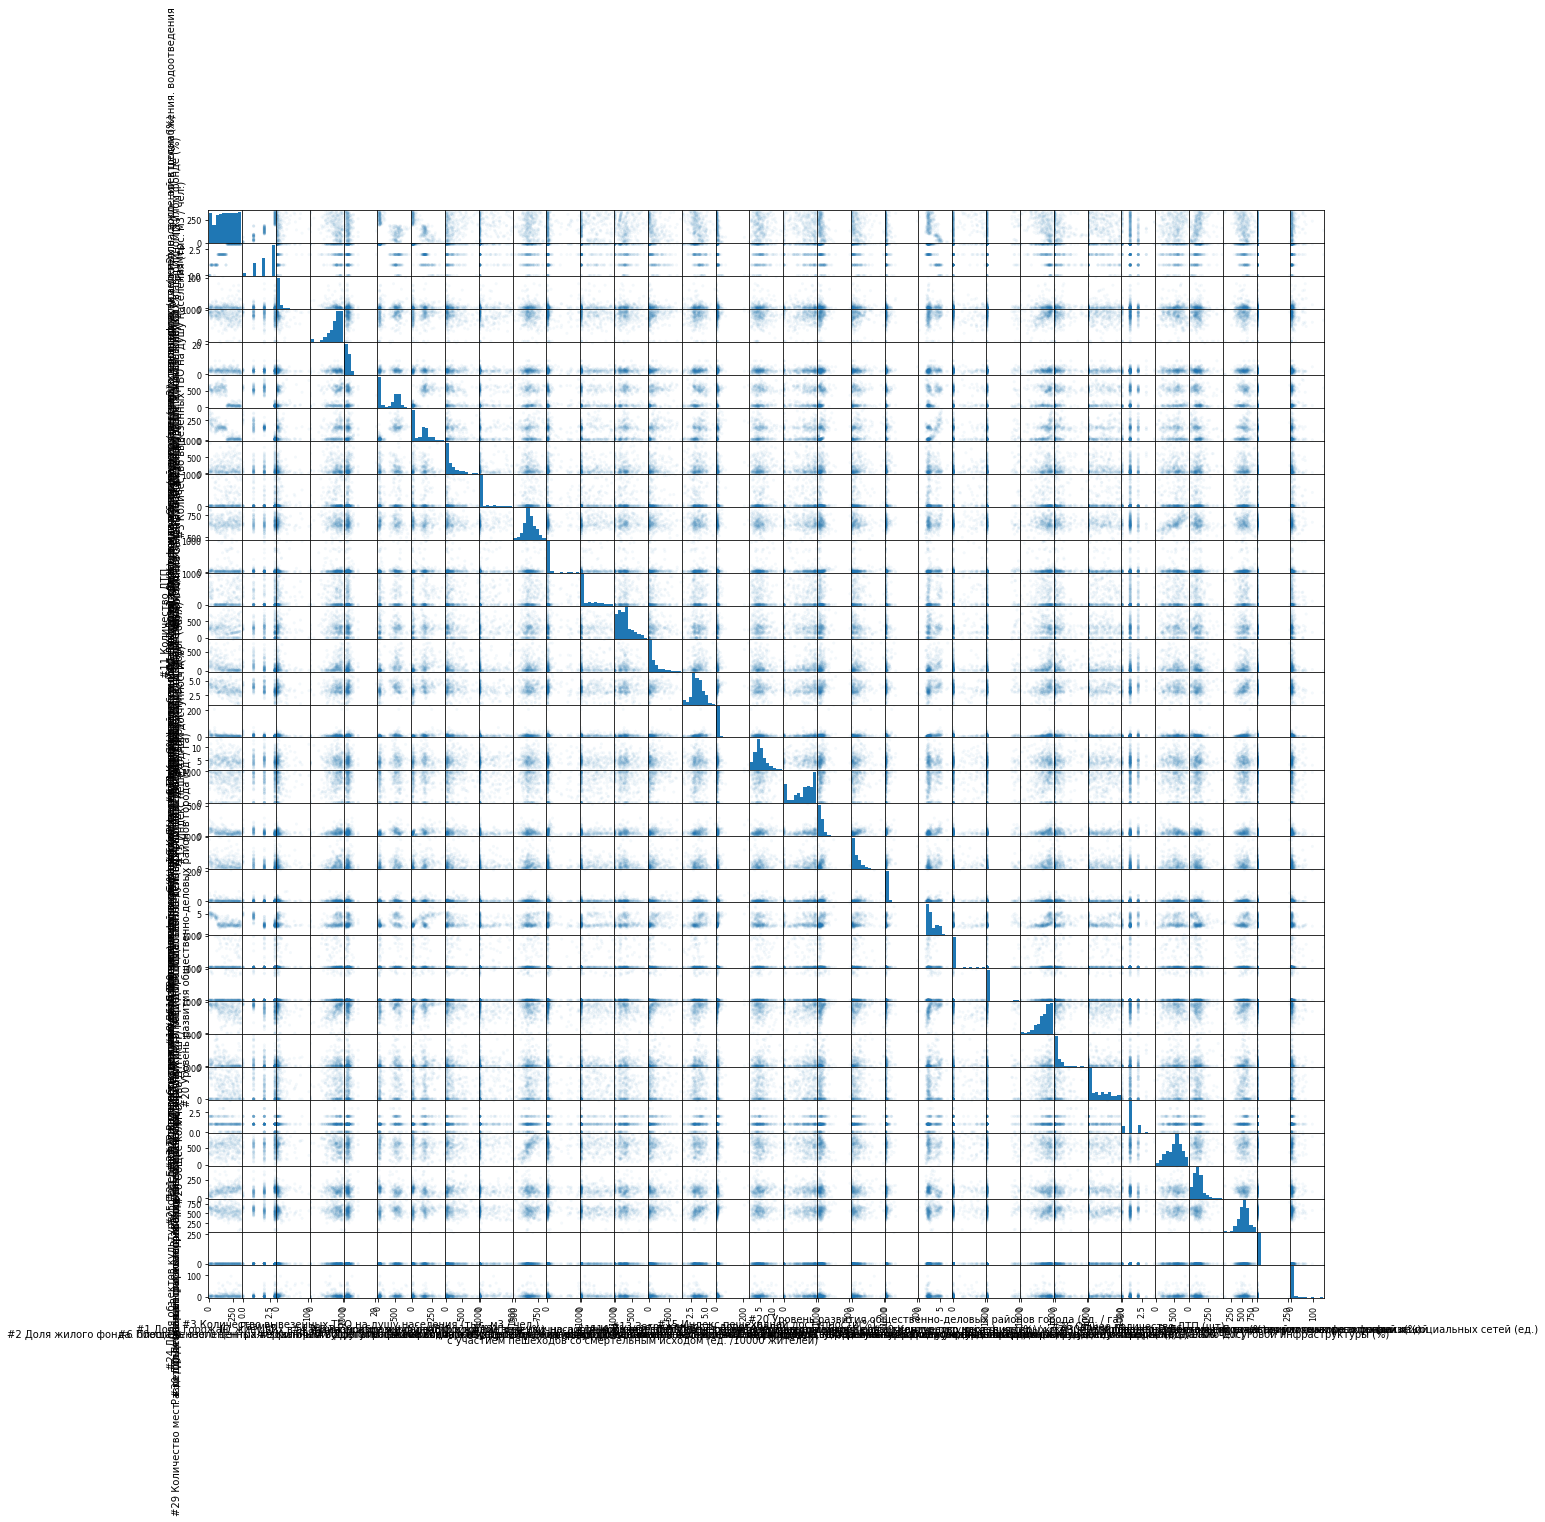

In [26]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(20, 20));

Для большего понимания построим матрицу корреляций всех признаков со всеми и будем считать значительными превосходящие 0.4 по модулю кроме диагональных.

In [27]:
data.iloc[:, 1:60].corr()

,Размер,#1 Доля горожан. живущих в аварийном жилом фонде (%),#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения,#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),#4 Разнообразие жилой застройки (%),#5 Разнообразие функций в жилой зоне (%),#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),#7 Доступность парков или обустроенного природного ландшафта,#8 Состояние зеленых насаждений(%),#9 Количество фотографий из социальных сетей. сделанных горожанами на озелененных территориях (ед. / км2),...,#22 Разнообразие культурно-спортивных функций в городе(%),#23 Доступность спортивных площадок для горожан(%),#24 Доля объектов культурного наследия. в которых размещаются объекты социально-досуговой инфраструктуры (%),#25 Посещаемость музеев и театров (ед. /1000 чел.),#26 Общее количество ДТП (шт),#28 Уровень озеленения города(%),#29 Количество мест. в которых сконцентрировано наибольшее количество уличных фотографий из социальных сетей (ед.),#30 Доля горожан. работающих в третичном секторе экономики(%),Раздел Q Деятельность экстерриториальных организаций,Доля аварийного жилого фонда
Размер,1.000000,0.107613,-0.303775,-0.061820,-0.800660,-0.869390,0.134572,0.084160,-0.010639,0.087267,...,0.052300,-0.410085,-0.285797,-0.081228,-0.264446,0.108188,0.325910,-0.276191,-0.133571,0.103546
#1 Доля горожан. живущих в аварийном жилом фонде (%),0.107613,1.000000,-0.030472,-0.090444,-0.020596,-0.106131,-0.155417,0.013404,-0.015189,0.128239,...,-0.089674,-0.076484,-0.029121,0.007152,-0.000880,0.030445,-0.022473,-0.092715,NaN,0.373944
#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения,-0.303775,-0.030472,1.000000,0.019216,0.288323,0.267567,-0.109658,-0.015554,-0.027083,-0.060580,...,-0.119243,0.334476,0.054662,-0.057024,0.113164,-0.043762,-0.148803,-0.106780,0.050094,-0.085237
#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.),-0.061820,-0.090444,0.019216,1.000000,0.040517,0.098322,0.079229,-0.090374,0.057028,-0.051662,...,0.028557,0.195665,0.023562,0.007623,0.102477,0.030426,0.027303,0.171309,-0.018074,-0.049848
#4 Разнообразие жилой застройки (%),-0.800660,-0.020596,0.288323,0.040517,1.000000,0.821886,-0.174010,-0.057719,-0.067194,-0.007804,...,-0.098579,0.265654,0.220863,0.069502,0.235741,-0.112775,-0.303763,0.183857,0.071872,-0.019047
#5 Разнообразие функций в жилой зоне (%),-0.869390,-0.106131,0.267567,0.098322,0.821886,1.000000,-0.119896,-0.100666,-0.050610,-0.061446,...,-0.019693,0.428251,0.181631,0.056127,0.229321,-0.162281,-0.280354,0.264303,0.070929,-0.103577
#6 Площадь озелененных территорий общего пользования (парки. сады и др.) к площади всех зеленых насаждений в целом (%),0.134572,-0.155417,-0.109658,0.079229,-0.174010,-0.119896,1.000000,-0.075008,-0.107786,-0.068906,...,0.103399,-0.047755,-0.003275,-0.113321,-0.004991,-0.054109,0.122929,0.073933,0.012427,-0.050629
#7 Доступность парков или обустроенного природного ландшафта,0.084160,0.013404,-0.015554,-0.090374,-0.057719,-0.100666,-0.075008,1.000000,0.080356,0.095536,...,-0.047232,-0.101315,0.005984,0.090058,-0.033456,0.090030,-0.030516,-0.123618,-0.026209,0.111534
#8 Состояние зеленых насаждений(%),-0.010639,-0.015189,-0.027083,0.057028,-0.067194,-0.050610,-0.107786,0.080356,1.000000,0.071340,...,-0.111228,-0.047029,-0.017757,0.048589,0.136235,0.686974,-0.139601,-0.042900,0.031816,-0.045097
#9 Количество фотографий из социальных сетей. сделанных горожанами на озелененных территориях (ед. / км2),0.087267,0.128239,-0.060580,-0.051662,-0.007804,-0.061446,-0.068906,0.095536,0.071340,1.000000,...,-0.010109,-0.062870,-0.082760,-0.051161,0.029375,0.075805,-0.054324,0.022227,0.002768,0.253139


Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [28]:
data.count(axis=0)

ID                                                                                                                                                                        324
Размер                                                                                                                                                                    324
#1 Доля горожан. живущих в аварийном жилом фонде (%)                                                                                                                      260
#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения                                                             293
#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)                                                                                                           315
#4 Разнообразие жилой застройки (%)                                                                                               

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [29]:
data = data.fillna(data.median(axis=0), axis=0)

Проверим, что теперь все столбцы, соответствующие количественным признакам, заполнены.

In [30]:
data.count(axis=0)

ID                                                                                                                                                                        324
Размер                                                                                                                                                                    324
#1 Доля горожан. живущих в аварийном жилом фонде (%)                                                                                                                      324
#2 Доля жилого фонда. обеспеченного централизованными услугами тепло-. водо-. электроснабжения. водоотведения                                                             324
#3 Количество вывезенных ТБО на душу населения (тыс. м3 / чел.)                                                                                                           324
#4 Разнообразие жилой застройки (%)                                                                                               

In [ ]:
X, y = load_digits(return_X_y=True)

clf = LogisticRegression()
clf.fit(X, y)
clf.predict(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

clf = LogisticRegression()
clf.fit(X_train, y_train)

accuracy_score(y_test, clf.predict(X_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

classifiers = [LogisticRegression(), KNeighborsClassifier(), LinearSVC()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))
    clf_name = clf.__class__.__name__
    print('{: <32} :{:.4f}'.format(clf_name, score))